In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
archContryVaccu=pd.read_csv("../orga2_21/country_vaccinations.csv",low_memory=False)
archContryVaccu.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
archContryVaccu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              11681 non-null  object 
 1   iso_code                             11681 non-null  object 
 2   date                                 11681 non-null  object 
 3   total_vaccinations                   6945 non-null   float64
 4   people_vaccinated                    6261 non-null   float64
 5   people_fully_vaccinated              4508 non-null   float64
 6   daily_vaccinations_raw               5806 non-null   float64
 7   daily_vaccinations                   11483 non-null  float64
 8   total_vaccinations_per_hundred       6945 non-null   float64
 9   people_vaccinated_per_hundred        6261 non-null   float64
 10  people_fully_vaccinated_per_hundred  4508 non-null   float64
 11  daily_vaccinations_per_milli

# 1- Obtener el país con mayor cantidad de gente vacunada
##### Nos quedaremos con las columnas que nos permitira resolver la consulta: country y people_vaccinated

In [4]:
country_peopleVacc=archContryVaccu.loc[:,["country","people_vaccinated"]]
country_peopleVacc.head(5)

,country,people_vaccinated
0,Afghanistan,0.0
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN


In [5]:
country_peopleVacc.country.unique().size #existen 177 paises

177

In [6]:
#lo que haremos es cambiar los nan por cero en la columna people_vaccinated y ademas cambiar el tipo de dato.

country_peopleVacc['people_vaccinated']=country_peopleVacc['people_vaccinated'].fillna(0).astype(int)
#country_peopleVacc['']
country_peopleVacc.head()

,country,people_vaccinated
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0


In [7]:
country_peopleVacc.groupby('country').agg({'people_vaccinated':'sum'}).nlargest(5,'people_vaccinated')

,people_vaccinated
country,
United States,5180217825
India,2349893050
United Kingdom,1757739257
England,1492778669
Brazil,661077769


In [8]:
country_peopleVacc.dtypes

country              object
people_vaccinated     int64
dtype: object

## Rpta: Mayor gente vacunada es en United States!

# 2- Realizar una visualización que permita comparar la cantidad de gente vacunada (vaccinated), con la que recibió ambas dosis (fully vaccinated). Pueden tomar los 10 países con mayor vacunación, ya sea en número como en porcentaje.

In [9]:
#traemos las columnas que nos interesan
vaccinatedVsFully=archContryVaccu.loc[:,["country","people_vaccinated","people_fully_vaccinated"]]
vaccinatedVsFully.head()

,country,people_vaccinated,people_fully_vaccinated
0,Afghanistan,0.0,NaN
1,Afghanistan,NaN,NaN
2,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
4,Afghanistan,NaN,NaN


In [10]:
vaccinatedVsFully=vaccinatedVsFully.fillna(0)
vaccinatedVsFully['people_vaccinated']=vaccinatedVsFully['people_vaccinated'].astype(int)
vaccinatedVsFully['people_fully_vaccinated']=vaccinatedVsFully['people_fully_vaccinated'].astype(int)
vaccinatedVsFully.head()

,country,people_vaccinated,people_fully_vaccinated
0,Afghanistan,0,0
1,Afghanistan,0,0
2,Afghanistan,0,0
3,Afghanistan,0,0
4,Afghanistan,0,0


In [11]:
top10vaccinatedVsFully=vaccinatedVsFully.groupby('country').agg({'people_vaccinated':'sum','people_fully_vaccinated':'sum'}).nlargest(10,'people_vaccinated')

In [12]:
top10vaccinatedVsFully.dtypes


people_vaccinated          int64
people_fully_vaccinated    int64
dtype: object

In [13]:
top10vaccinatedVsFully.reset_index(inplace=True)
top10vaccinatedVsFully

,country,people_vaccinated,people_fully_vaccinated
0,United States,5180217825,2579778952
1,India,2349893050,372253519
2,United Kingdom,1757739257,174216363
3,England,1492778669,138290421
4,Brazil,661077769,173768485
5,Germany,485799047,204138828
6,Turkey,469736761,240696009
7,Israel,415027179,292487315
8,France,357126053,126854579
9,Italy,355675699,159090573


In [14]:
top10vaccinatedVsFully.columns

Index(['country', 'people_vaccinated', 'people_fully_vaccinated'], dtype='object')

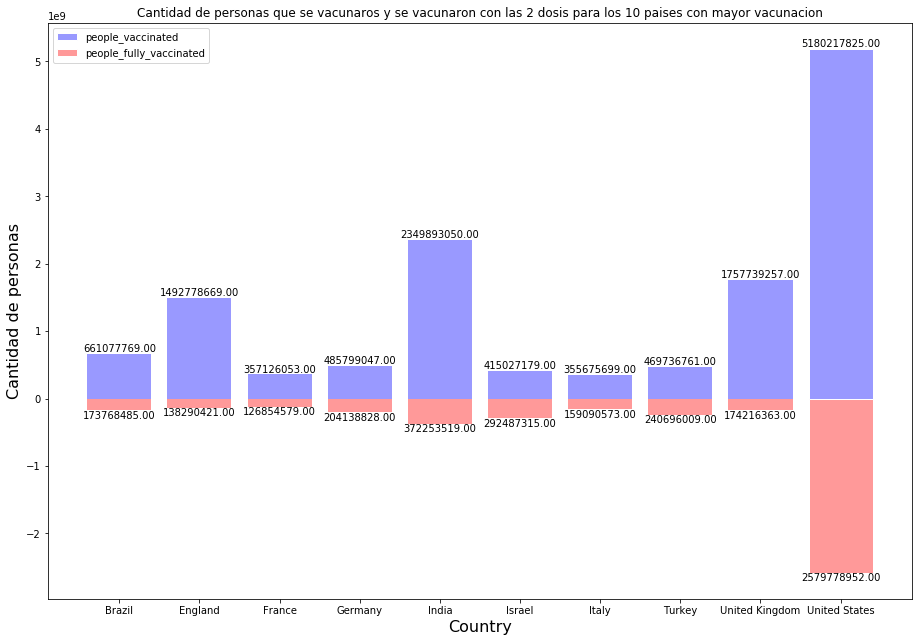

In [17]:
n = 10
X =  top10vaccinatedVsFully['country']
Y1 = top10vaccinatedVsFully['people_vaccinated']
Y2 = top10vaccinatedVsFully['people_fully_vaccinated']

plt.axes([0, 0, 2, 2])
plt.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x , y + 0.05, '%.2f' % y, ha='center', va= 'bottom',size=10)

for x, y in zip(X, Y2):
    plt.text(x, -y - 0.05, '%.2f' % y, ha='center', va= 'top',size=10)

plt.xlabel('Country',size=16)
plt.ylabel('Cantidad de personas', size=16)
plt.title('Cantidad de personas que se vacunaros y se vacunaron con las 2 dosis para los 10 paises con mayor vacunacion')
plt.legend(['people_vaccinated','people_fully_vaccinated'])
plt.show()



